# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

## Dataset

In [117]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

In [118]:
X.shape, Y.shape

((500, 2), (500,))

500 examples -> X has 2 dimensions

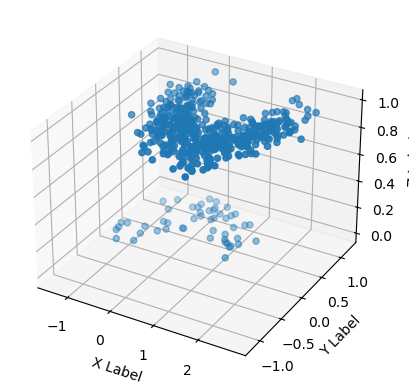

In [119]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Classification problem so something to start out like logistic regression is going to be good

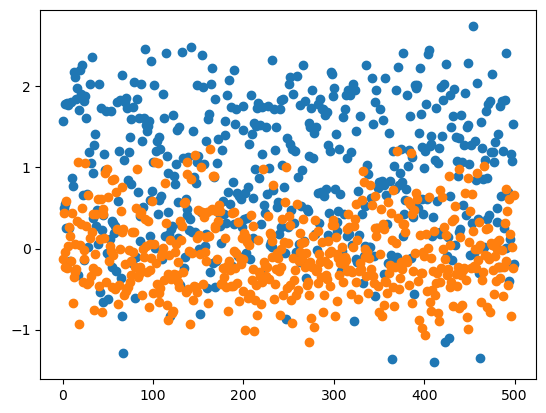

In [120]:
plt.plot(X, 'o');

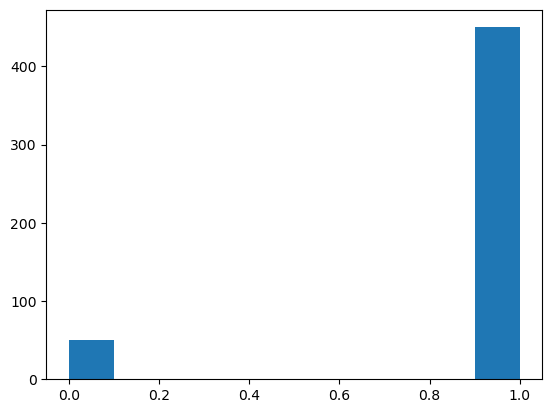

In [121]:
plt.hist(Y);

We also have an imbalanced dataset so we are going to have to edit how we do sampling to ensure the model doesn't learn to guess 1 all the time.
- Stratified sampling
- Oversampling
- Undersampling

## Training

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [123]:
np.mean(Y == 1)

0.9

In [124]:
np.mean(Y_test == 1)

0.85

In [125]:
model = LogisticRegression()

In [126]:
model.fit(X_train, Y_train)

LogisticRegression()

In [127]:
model.coef_

array([[ 1.26978034, -3.1782766 ]])

In [128]:
Y_pred = model.predict(X_test)

In [129]:
f1 = f1_score(Y_test, Y_pred)
acc = accuracy_score(Y_test, Y_pred)
print(f"F1 Score: {f1} \nAccuracy: {acc}")

F1 Score: 0.9491525423728814 
Accuracy: 0.91


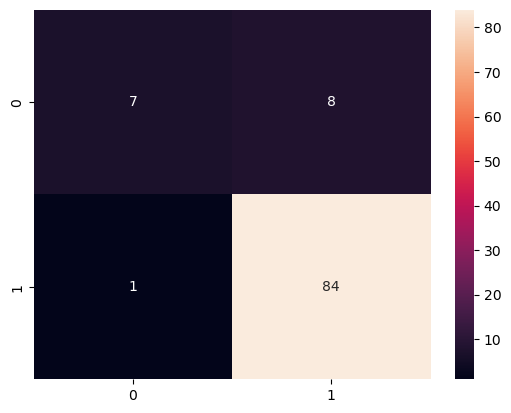

In [130]:
cf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cf_matrix, annot=True);

## Testing / Optimization

## Performance Analysis